In [1]:
import pandas as pd
df = pd.read_csv('tweets.csv')
df['Date'] = df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [2]:
len(df[df['Date'] > '2022-03-14'])

10877

In [3]:
len(df[df['Date'].dt.strftime('%Y-%m-%d') == '2022-03-16'])

1171

In [4]:
len(df)

53842

In [5]:
df['Date'][0].date()

datetime.date(2022, 3, 29)

In [6]:
filtered_df = df.loc[(df['Date'] >= '2022-03-14')
                     & (df['Date'] < '2022-03-15')]

In [7]:
filtered_df

,Unnamed: 0,Date,Location,User,Tweet
10877,10877,2022-03-14,"Washington, DC",ChadBown,How ending the ethanol mandates will boost the...
10878,10878,2022-03-14,Seattle (for now),DevonHeinen,#BREAKING\nUS State Dept issues stmt saying US...
10879,10879,2022-03-14,NaN,DougJBalloon,Putin invaded Ukraine. So why does it feel lik...
10880,10880,2022-03-14,United States,ThreeCalories,I have discovered another bridge built by #Rus...
10881,10881,2022-03-14,"Brooklyn, NY",mmpadellan,"With Putin's war raging in Ukraine, it rages o..."
...,...,...,...,...,...
11865,11865,2022-03-14,NaN,GoonerProf,For the love of anything that is good in this ...
11866,11866,2022-03-14,NaN,bad_immigrant,Villa of #Putin's daughter was occupied in Fra...
11867,11867,2022-03-14,USA,DAlperovitch,"🚨 LIVE NOW 🚨: @KofmanMichael, @RALee85 and mys..."
11868,11868,2022-03-14,Global,AP,The shells of bombed-out buildings. A damaged ...


In [8]:
df['Tweet'].tolist()

["another reminder of what has long been obvious:\n\nin the war between Ukraine and Russia, between Western freedom and authoritarian aggression, Donald Trump is on the anti-American side\n\nhe's the former president,\nbut not only that\n\nTrump is the leader of the Republican Party TODAY https://t.co/JLfqZbncV8",
 "What if Putin didn’t miscalculate? The territory he's gained from Ukraine comprises Europe's second largest known reserves of natural gas, after Norway's. Great piece by Bret Stephens @nytopinion. https://t.co/rnI8j3SESf",
 "NEW TODAY: Donald Trump brazenly called on Vladimir Putin to release any damaging info he's got about the Bidens. This isn't the first time Trump enlisted a foreign power to smear a political rival (Russia/2016, Ukraine/2019). Wasn't OK then, isn't OK now. https://t.co/RHu2F7aj6r",
 'Ukraine regains territory while eliminating another high ranking officer in the process… pretty soon the Russian soldiers will be running things… when you lack the weapons 

In [10]:
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

ImportError: cannot import name 'SAVE_STATE_WARNING' from 'torch.optim.lr_scheduler' (/Users/sharathchandra/opt/anaconda3/lib/python3.8/site-packages/torch/optim/lr_scheduler.py)

In [47]:
import numpy as np

def process(data_al):
    ss= [flair.data.Sentence(sent) for sent in data_al]
    flair_sentiment.predict(ss, mini_batch_size=32)
    results = [(x.labels[0].value, x.labels[0].score) for x in ss]
    pos = np.sum([s for v, s in results if v == 'POSITIVE'])
    neg = np.sum([s for v, s in results if v == 'NEGATIVE'])
    return [pos, neg]

In [48]:
process(df[:10]['Tweet']), process(df[10:20]['Tweet'])

([2.752095580101013, 6.167742013931274],
 [1.765357792377472, 7.165622711181641])

In [49]:
from datetime import date, timedelta
data_dict={}
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2022, 2, 14)
end_date = date(2022, 3, 30)
for single_date in daterange(start_date, end_date):
    data = df[df['Date'].dt.strftime('%Y-%m-%d') == str(single_date)]['Tweet'].tolist()
    data_dict[single_date] = process(data)

In [66]:
data_dict

{datetime.date(2022, 2, 14): [[0.01, 0.09, 0.9],
  [0.01, 0.1, 0.89],
  [0.02, 0.08, 0.9],
  [0.08, 0.5, 0.42],
  [0.0, 0.02, 0.97],
  [0.03, 0.8, 0.17],
  [0.01, 0.07, 0.92],
  [0.01, 0.01, 0.98],
  [0.0, 0.03, 0.97],
  [0.01, 0.06, 0.93],
  [0.01, 0.04, 0.95],
  [0.01, 0.04, 0.96],
  [0.03, 0.73, 0.24],
  [0.02, 0.26, 0.72],
  [0.0, 0.03, 0.96],
  [0.02, 0.06, 0.92],
  [0.04, 0.55, 0.41],
  [0.07, 0.8, 0.13],
  [0.01, 0.04, 0.95],
  [0.01, 0.24, 0.74],
  [0.02, 0.31, 0.67],
  [0.29, 0.04, 0.67],
  [0.0, 0.0, 0.99],
  [0.01, 0.03, 0.96],
  [0.01, 0.07, 0.91],
  [0.02, 0.12, 0.86],
  [0.02, 0.11, 0.88],
  [0.02, 0.19, 0.79],
  [0.01, 0.04, 0.95],
  [0.01, 0.1, 0.89]],
 datetime.date(2022, 2, 15): [[0.02, 0.12, 0.87],
  [0.01, 0.1, 0.89],
  [0.45, 0.1, 0.45],
  [0.02, 0.34, 0.64],
  [0.01, 0.03, 0.96],
  [0.01, 0.09, 0.89],
  [0.73, 0.13, 0.14],
  [0.02, 0.8, 0.18],
  [0.01, 0.07, 0.92],
  [0.02, 0.23, 0.75],
  [0.01, 0.06, 0.93],
  [0.01, 0.22, 0.77],
  [0.02, 0.21, 0.77],
  [0.03, 0.4

In [98]:
start_date = date(2022, 2, 24)
end_date = date(2022, 3, 30)
overall_sentiment=[]
for single_date in daterange(start_date, end_date):
    overall_sentiment.append(np.mean(np.asarray(data_dict[single_date]),axis=0))
    
    

In [83]:
np.asarray(overall_sentiment)[:,2]

array([0.77041284, 0.74554902, 0.76852273, 0.7514    , 0.78064706,
       0.78370968, 0.76536667, 0.80223077, 0.7997619 , 0.77376471,
       0.7597    , 0.7635    , 0.78563158, 0.817625  , 0.76258824,
       0.80964706, 0.813     , 0.749     , 0.78141176, 0.77230769,
       0.76323529, 0.74669231, 0.78716667, 0.79588889, 0.81281818,
       0.79422222, 0.7904    , 0.78218182, 0.70223077, 0.758     ,
       0.7795    , 0.810875  , 0.78188889, 0.71909091])

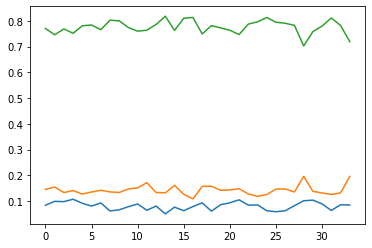

In [103]:
import pandas as pd
from matplotlib import pyplot as plt

plt.plot(np.asarray(overall_sentiment)[:,0])
plt.plot(np.asarray(overall_sentiment)[:,1])
plt.plot(np.asarray(overall_sentiment)[:,2])
 
plt.show()

In [89]:
start_date = date(2022, 2, 24)
end_date = date(2022, 3, 30)
overall_sentiment=[]
count = 0
for single_date in daterange(start_date, end_date):
    count+=1

In [90]:
count

34

In [96]:
a=np.asarray(overall_sentiment)[:,2]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [99]:
overall_sentiment

[array([0.08409174, 0.14577064, 0.77041284]),
 array([0.09937255, 0.15511765, 0.74554902]),
 array([0.09811364, 0.13331818, 0.76852273]),
 array([0.10745, 0.1412 , 0.7514 ]),
 array([0.09176471, 0.12767647, 0.78064706]),
 array([0.08083871, 0.13554839, 0.78370968]),
 array([0.0931    , 0.14223333, 0.76536667]),
 array([0.062     , 0.13596154, 0.80223077]),
 array([0.06633333, 0.13366667, 0.7997619 ]),
 array([0.07864706, 0.14758824, 0.77376471]),
 array([0.08905, 0.1514 , 0.7597 ]),
 array([0.06461111, 0.17188889, 0.7635    ]),
 array([0.081     , 0.13378947, 0.78563158]),
 array([0.0505   , 0.1320625, 0.817625 ]),
 array([0.07676471, 0.16117647, 0.76258824]),
 array([0.06305882, 0.12664706, 0.80964706]),
 array([0.07913333, 0.10886667, 0.813     ]),
 array([0.09335714, 0.1575    , 0.749     ]),
 array([0.06111765, 0.15782353, 0.78141176]),
 array([0.08630769, 0.14230769, 0.77230769]),
 array([0.09370588, 0.14347059, 0.76323529]),
 array([0.10515385, 0.14846154, 0.74669231]),
 array([0

In [104]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sharathchandra/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [107]:
sid.polarity_scores("This is not bad")

{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.431}

In [12]:
# !pip3 install flair
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
s = flair.data.Sentence("This is not bad")
flair_sentiment.predict(s)
total_sentiment = s.labels



ImportError: cannot import name 'SAVE_STATE_WARNING' from 'torch.optim.lr_scheduler' (/Users/sharathchandra/opt/anaconda3/lib/python3.8/site-packages/torch/optim/lr_scheduler.py)

In [11]:
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
s = flair.data.Sentence("This is not bad")
flair_sentiment.predict(s)
total_sentiment = s.labels
print(total_sentiment)

NameError: name 'flair' is not defined

In [114]:
!pip install -q torch==1.4.0 -f https://download.pytorch.org/whl/cu101/torch_stable.html


In [112]:
!pip install transformers

In [116]:
pip upgarde torch

ERROR: unknown command "upgarde"
Note: you may need to restart the kernel to use updated packages.


In [ ]:
0.11.1

In [16]:
20000%10000==0

True